# IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CARGAR DATOS

In [2]:
preprocessed_peguins_df = sns.load_dataset('penguins')
preprocessed_peguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# VALIDACIÓN DE DATOS

## ¿Qué tipo de dato tienen las variables del dataset?

In [3]:
preprocessed_peguins_df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


## ¿Cuántas variables de cada tipo de datos tenemos en el dataset?

In [5]:
preprocessed_peguins_df.dtypes.value_counts()

,count
float64,4
object,3


## ¿Cuantas variables y registros tenemos en el dataset?(filas y columnas)

In [6]:
preprocessed_peguins_df.shape

(344, 7)

# VALIDACIÓN DE DATOS NULOS

## ¿Existen valores nulos en el dataset?

In [7]:
preprocessed_peguins_df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


## ¿Que variables tienen datos nulos?

In [8]:
preprocessed_peguins_df.isnull().any()

,0
species,False
island,False
bill_length_mm,True
bill_depth_mm,True
flipper_length_mm,True
body_mass_g,True
sex,True


## ¿Cuantos valores nulos se tienen por variable?

In [9]:
preprocessed_peguins_df.isnull().sum().sort_values(ascending=False)

,0
sex,11
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
species,0
island,0


## ¿Cuántos valores nulos tenemos en total en el dataset?

In [10]:
preprocessed_peguins_df.isnull().sum().sum()

19

## ¿Cual es la proporción de valores nulos por cada variable?

In [11]:
preprocessed_peguins_df.isnull().melt(value_name='missing')

,variable,missing
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2403,sex,True
2404,sex,False
2405,sex,False
2406,sex,False


# GRAFIMOS LOS VALORES NULOS

In [12]:
penguins_null_df = preprocessed_peguins_df.isnull().melt(value_name='missing')
penguins_null_df

,variable,missing
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2403,sex,True
2404,sex,False
2405,sex,False
2406,sex,False


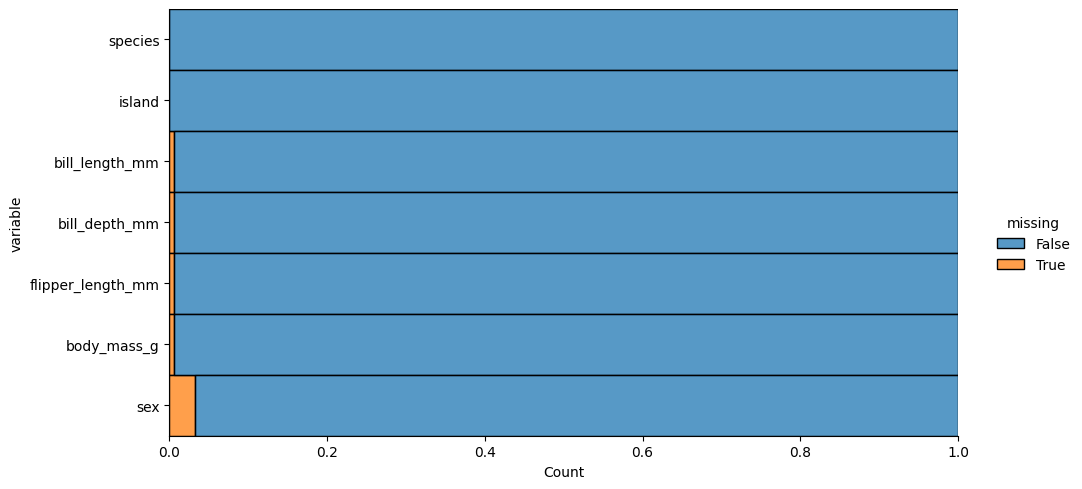

In [17]:
sns.displot(data=penguins_null_df,y='variable',hue='missing',aspect=2,multiple='fill')
plt.show()

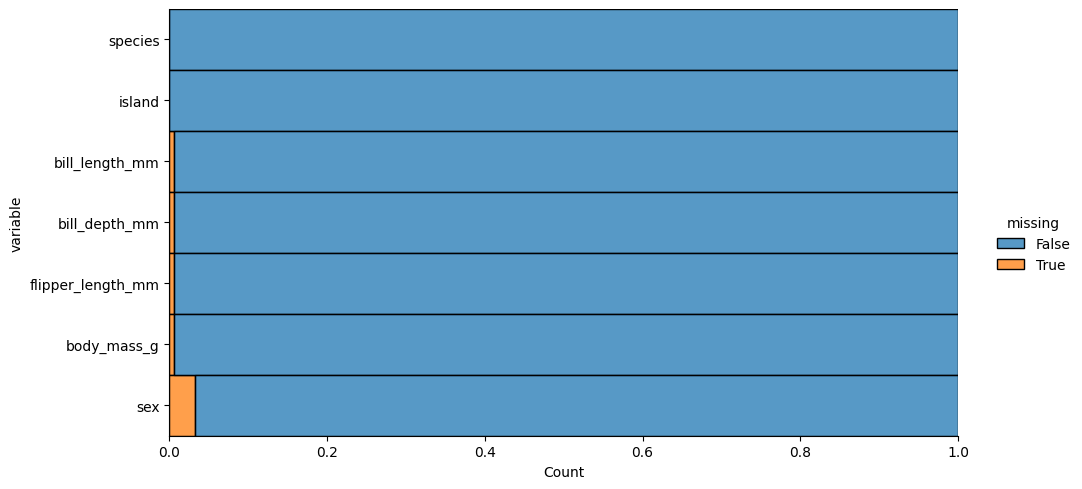

In [18]:
(
    preprocessed_peguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df :(
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)